In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Các phương thức được sử dụng trong bài phân tích này (Với pandas:

1. **`pd.read_excel()`**: Đọc dữ liệu từ file excel
- Tham số skiprows: Bỏ qua n dòng đầu tiên

2. **`df.reset_index(drop = True)`**: Thiết lập lại chỉ mục của df

3. Các thuộc tính của df:
- `df.index`: Chỉ số hàng
- `df.columns`: Danh sách tên cột

4. **`df.drop(Cột, axis = 1)`**: Loại bỏ cột

5. **`df.drop(Hàng, axis = 0)`**: Loại bỏ hàng

6. **`df.insert(loc = <STT cột cần chèn>, column = <Tên cột>, value = <Biến đại diện cho cột>)`**: Chèn cột vào giữa 2 cột

7. **`df.fillna(<GT> , inplace = True)`**: Thay thế giá trị trống trong df bằng giá trị tương ứng:
- GT = <GT cụ thể>
- GT = {<Tên cột> : <GT tương ứng}
- GT = df.mean(): Lấy mean
- GT = df.median(): Lấy median
- Tham số method = 'ffill': Lấy giá trị missing từ ô trước nó
- Tham số method = 'bfill': Lấy giá trị missing từ ô sau nó

8. **`df[điều kiện của df]`**: Câu lệnh truy vấn

9. **`df.sort_values(by = <cột>, ascending = False)`**: Sắp xếp df theo cột và theo thứ tự giảm dần (ascending = True: Tăng dần)

10. **`df[df[<Cột>].between(x, y, inclusive = 'neither')]`**: Lọc 1 cột trong ngưỡng (x, y):
- inclusive =
  - 'neither': (x, y)
  - 'left' : [x, y)
  - 'right' : (x, y]
  - 'both' : [x, y]
- Có thể viết lại là: `df[(x < df[Cột]) & (df[Cột] < y)]`

11. **`sum(df[<Cột>] < 5)`**: Đếm số lượng hàng thỏa mãn điều kiện lọc

12. **`my_rank = df.index.get_loc(i) + 1`**: Tìm vị trí (index) của hàng có chỉ số là i trong DataFrame.


In [3]:
# Đọc dữ liệu
SCORES = pd.read_excel(r".\RS1_HM22_diemgui.xlsx", skiprows = 3)

# Thay đổi chỉ số
SCORES = SCORES.reset_index(drop=True)
SCORES.index = SCORES.index + 1

# Loại bỏ cột 'Stt' nếu nó tồn tại
if 'Stt' in SCORES.columns:
    SCORES = SCORES.drop('Stt', axis=1)

# Loại bỏ các hàng trống
SCORES = SCORES.dropna(how = 'all')

# Loại bỏ 2 cột trống (Do giảng viên đánh dấu)
SCORES = SCORES.drop(SCORES.columns[:-3:-1], axis = 1)


SCORES.iloc[:, :]

,Mã SV,Họ lót,Tên,Mã lớp,Giữa kỳ 50%,Thi,TK
1,22166003,NGUYỄN THỊ KIM,ANH,DH22HM,6.8,4.6,5.7
2,22166002,NGUYỄN NGỌC,ẤN,DH22HM,8.6,3.6,6.1
3,22166004,DƯƠNG VĂN,BẢO,DH22HM,7.0,3.6,5.3
4,22166006,LÊ VĂN,CHƯƠNG,DH22HM,7.8,4.8,6.3
5,22166007,ĐINH CÔNG,DANH,DH22HM,6.8,4.4,5.6
...,...,...,...,...,...,...,...
78,22166103,TRẦN DƯƠNG,VINH,DH22HM,8.2,4.4,6.3
79,22166104,NGUYỄN NHẬT,VŨ,DH22HM,7.6,6.2,6.9
80,22166105,TRẦN SANG,XUÂN,DH22HM,6.6,4.6,5.6
81,22166106,VÕ THỊ NHƯ,Ý,DH22HM,7.4,3.0,5.2


# **Công đoạn tiền xử lí dữ liệu**

## **Xử lý về họ tên của sinh viên**

In [4]:
names = SCORES["Họ lót"] + " " + SCORES["Tên"]
SCORES.insert(loc = 1, column = "Tên đầy đủ", value = names)

SCORES = SCORES.drop(["Họ lót", "Tên"], axis = 1)

names

1     NGUYỄN THỊ KIM ANH
2         NGUYỄN NGỌC ẤN
3          DƯƠNG VĂN BẢO
4          LÊ VĂN CHƯƠNG
5         ĐINH CÔNG DANH
             ...        
78       TRẦN DƯƠNG VINH
79        NGUYỄN NHẬT VŨ
80        TRẦN SANG XUÂN
81          VÕ THỊ NHƯ Ý
82           BÙI THỊ YẾN
Length: 82, dtype: object

## **Xử lý các cột điểm của sinh viên**

In [5]:
# Loại bỏ các dòng trống
SCORES.fillna(0, inplace = True)

middle = SCORES["Giữa kỳ 50%"]
middle

1     6.8
2     8.6
3     7.0
4     7.8
5     6.8
     ... 
78    8.2
79    7.6
80    6.6
81    7.4
82    6.8
Name: Giữa kỳ 50%, Length: 82, dtype: float64

In [6]:
final = SCORES["Thi"]
final

1     4.6
2     3.6
3     3.6
4     4.8
5     4.4
     ... 
78    4.4
79    6.2
80    4.6
81    3.0
82    5.0
Name: Thi, Length: 82, dtype: float64

In [7]:
gpa = SCORES["TK"]
gpa

1     5.7
2     6.1
3     5.3
4     6.3
5     5.6
     ... 
78    6.3
79    6.9
80    5.6
81    5.2
82    5.9
Name: TK, Length: 82, dtype: float64

# **Truy vấn dữ liệu trong bảng điểm**

In [8]:
# Truy vấn ai rớt môn
SCORES[SCORES["TK"] < 4]

,Mã SV,Tên đầy đủ,Mã lớp,Giữa kỳ 50%,Thi,TK
21,22166031,NGUYỄN THỊ HUYỀN,DH22HM,3.2,0.0,1.6
28,22166041,NGUYỄN LƯU TRỌNG LỄ,DH22HM,5.2,2.4,3.8
60,21157026,Phạm Thuỷ Tiên,DH21DL,0.0,0.0,0.0


In [9]:
# Truy vấn đứa có điểm GK cao nhất
SCORES[SCORES["Giữa kỳ 50%"] == SCORES["Giữa kỳ 50%"].max()]

,Mã SV,Tên đầy đủ,Mã lớp,Giữa kỳ 50%,Thi,TK
18,22166026,BÙI THANH HOÀNG,DH22HM,9.3,6.0,7.65


In [10]:
# Truy vấn đứa có điểm CK cao nhất
SCORES[SCORES["Thi"] == SCORES["Thi"].max()]

,Mã SV,Tên đầy đủ,Mã lớp,Giữa kỳ 50%,Thi,TK
13,22166018,NGUYỄN THANH GIANG,DH22HM,8.65,9.0,8.825
75,22166099,HỒ MẠNH TƯỜNG,DH22HM,8.05,9.0,8.525


In [11]:
# Truy vấn đứa có điểm TK cao nhất
SCORES[SCORES["TK"] == SCORES["TK"].max()]

,Mã SV,Tên đầy đủ,Mã lớp,Giữa kỳ 50%,Thi,TK
13,22166018,NGUYỄN THANH GIANG,DH22HM,8.65,9.0,8.825


# **Mô hình hóa dữ liệu**

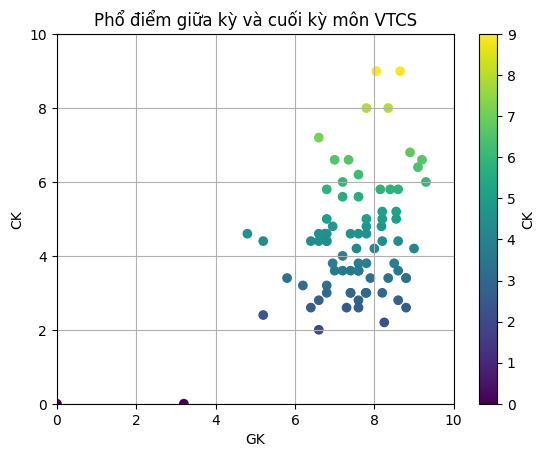

In [12]:
plt.scatter(middle, final, c = final)
plt.colorbar(label = "CK")
plt.xlabel("GK")
plt.ylabel("CK")
plt.title("Phổ điểm giữa kỳ và cuối kỳ môn VTCS")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()

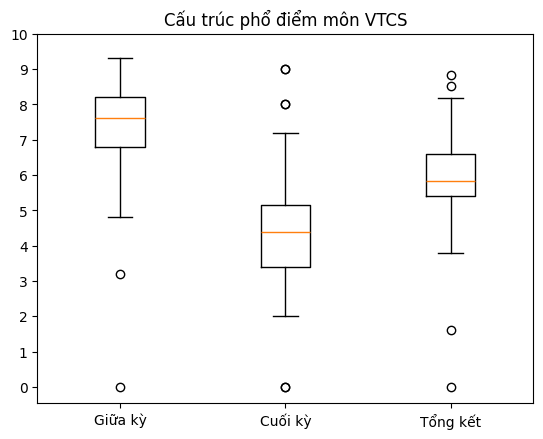

In [13]:
plt.boxplot([middle, final, gpa])
plt.title("Cấu trúc phổ điểm môn VTCS")
plt.xticks([1, 2, 3], ['Giữa kỳ', 'Cuối kỳ', 'Tổng kết'])
plt.yticks(range(11))
plt.savefig("Boxplot.png")
plt.show()


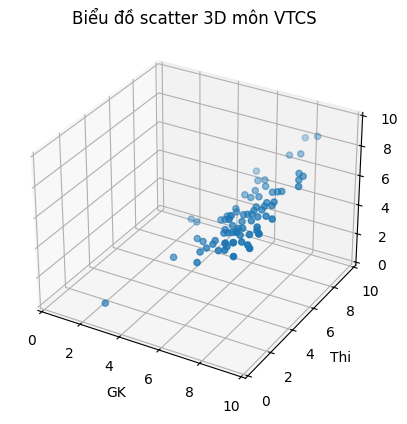

In [14]:
# Lọc ra các hàng có điểm cuối kỳ, giữa kỳ và GPA đều bằng 0
rows_to_drop = SCORES[(SCORES["Giữa kỳ 50%"] == 0) & (SCORES["Thi"] == 0) & (SCORES["TK"] == 0)].index

# Loại bỏ các hàng này khỏi DataFrame
SCORES_filtered = SCORES.drop(rows_to_drop)

# Chuẩn bị dữ liệu cho scatter plot 3D
GK = SCORES_filtered["Giữa kỳ 50%"]
Thi = SCORES_filtered["Thi"]
TK = SCORES_filtered["TK"]

# Tạo figure và subplot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter plot 3D
ax.scatter(GK, Thi, TK)

# Đặt nhãn trục và tiêu đề
ax.set_xlabel('GK')
ax.set_ylabel('Thi')
ax.set_zlabel('TK')
ax.set_title('Biểu đồ scatter 3D môn VTCS')

# Thay đổi giới hạn
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()

# **Thực hành thống kê bảng điểm**

In [15]:
print(SCORES_filtered["Giữa kỳ 50%"].describe())
print(SCORES_filtered["Thi"].describe())
print(SCORES_filtered["TK"].describe())

count    81.000000
mean      7.518642
std       1.045019
min       3.200000
25%       6.800000
50%       7.600000
75%       8.200000
max       9.300000
Name: Giữa kỳ 50%, dtype: float64
count    81.000000
mean      4.424691
std       1.594171
min       0.000000
25%       3.400000
50%       4.400000
75%       5.200000
max       9.000000
Name: Thi, dtype: float64
count    81.000000
mean      5.971667
std       1.095447
min       1.600000
25%       5.400000
50%       5.875000
75%       6.600000
max       8.825000
Name: TK, dtype: float64


# **So sánh điểm của người dùng với mặt bằng chung của cả lớp**

In [16]:
test = SCORES.iloc[17, :]
test

Mã SV                 22166026
Tên đầy đủ     BÙI THANH HOÀNG
Mã lớp                  DH22HM
Giữa kỳ 50%                9.3
Thi                        6.0
TK                        7.65
Name: 18, dtype: object

In [17]:
# Assuming you have already defined `middle`, `final`, and `gpa` as means
GK = SCORES_filtered["Giữa kỳ 50%"]
Thi = SCORES_filtered["Thi"]
TK = SCORES_filtered["TK"]
my_class = [GK.mean(), Thi.mean(), TK.mean()]

# Assuming `test` contains your scores for a specific student (row 17)
my_score = [test['Giữa kỳ 50%'], test['Thi'], test['TK']]

# Create a DataFrame for comparison
comparison = pd.DataFrame([my_score, my_class], columns=["GK", "CK", "TK"], index=["Tôi", "Cả lớp"]).T
comparison

,Tôi,Cả lớp
GK,9.30,7.518642
CK,6.00,4.424691
TK,7.65,5.971667


# **Sắp xếp bảng điểm cho vui**:

In [18]:
# Tạo DataFrame mới từ SCORES và sắp xếp theo cột TK
sorted_scores = SCORES.sort_values(by='TK', ascending=False)

# In ra một số hàng đầu của DataFrame mới
print(sorted_scores.head(10))

# Xem coi mình đang ở hạng bao nhiêu trong bảng điểm nghiệt ngã này.
my_rank = sorted_scores.index.get_loc(17) + 1  # +1 vì vị trí bắt đầu từ 0

print(f'Hạng điểm tổng kết của bạn là: {my_rank}')


       Mã SV          Tên đầy đủ  Mã lớp  Giữa kỳ 50%  Thi     TK
13  22166018  NGUYỄN THANH GIANG  DH22HM         8.65  9.0  8.825
75  22166099       HỒ MẠNH TƯỜNG  DH22HM         8.05  9.0  8.525
76  22166101  NGUYỄN THỊ MỸ UYÊN  DH22HM         8.35  8.0  8.175
70  22166092     NGUYỄN NHÃ TRÚC  DH22HM         7.80  8.0  7.900
51  22166069     NGUYỄN MINH PHÚ  DH22HM         9.20  6.6  7.900
12  22166017  NGUYỄN HOÀNG GIANG  DH22HM         8.90  6.8  7.850
44  22166061   TRẦN THỊ NHƯ NGỌC  DH22HM         9.10  6.4  7.750
18  22166026     BÙI THANH HOÀNG  DH22HM         9.30  6.0  7.650
38  22166054  TRẦN NHẬT HUYỀN MY  DH22HM         8.60  5.8  7.200
67  22166089  LÊ NGUYỄN MINH TRÍ  DH22HM         8.40  5.8  7.100
Hạng điểm tổng kết của bạn là: 68


## Câu hỏi truy vấn: với bảng dữ liệu 82 bạn sinh viên đó (tính luôn bạn 3 cột 0 điểm), top bao nhiêu là điểm TK dưới 5?

In [19]:
print(sum(SCORES["TK"] > 5))
print(sorted_scores.tail(12))

69
       Mã SV           Tên đầy đủ  Mã lớp  Giữa kỳ 50%  Thi    TK
6   22166012        PHẠM KHẮC DUY  DH22HM          7.3  2.6  4.95
57  22166078      TRƯƠNG ĐÌNH THẾ  DH22HM          6.8  3.0  4.90
58  22166080    NGUYỄN PHÚC THIỆN  DH22HM          5.2  4.4  4.80
26  22166040  TRẦN NGUYỄN VÂN LAN  DH22HM          6.2  3.2  4.70
68  22166090         ĐỖ PHÚ TRỌNG  DH22HM          4.8  4.6  4.70
20  22166029        ĐẶNG NGỌC HUY  DH22HM          6.6  2.8  4.70
35  22166050    TRƯƠNG THỊ HOA LÝ  DH22HM          5.8  3.4  4.60
54  21157097       Nguyễn Phú Quí  DH21DL          6.4  2.6  4.50
33  22166048  HUỲNH VÕ KHÁNH LUÂN  DH22HM          6.6  2.0  4.30
28  22166041  NGUYỄN LƯU TRỌNG LỄ  DH22HM          5.2  2.4  3.80
21  22166031     NGUYỄN THỊ HUYỀN  DH22HM          3.2  0.0  1.60
60  21157026       Phạm Thuỷ Tiên  DH21DL          0.0  0.0  0.00


In [20]:
# Tạo DataFrame mới từ SCORES và sắp xếp theo cột TK
final_sorted = SCORES.sort_values(by='Thi', ascending=False)


final_sorted[final_sorted['Thi'].between(0, 5, inclusive = 'neither')]

,Mã SV,Tên đầy đủ,Mã lớp,Giữa kỳ 50%,Thi,TK
4,22166006,LÊ VĂN CHƯƠNG,DH22HM,7.80,4.8,6.300
64,22166088,PHAN THỊ QUỲNH TRANG,DH22HM,6.95,4.8,5.875
9,22166008,VŨ HOÀNG ĐẠT,DH22HM,8.18,4.8,6.490
19,21166125,Bùi Phú Gia Huy,DH21HM,7.60,4.6,6.100
80,22166105,TRẦN SANG XUÂN,DH22HM,6.60,4.6,5.600
77,22166102,ĐINH TRÚC VÂN,DH22HM,7.80,4.6,6.200
68,22166090,ĐỖ PHÚ TRỌNG,DH22HM,4.80,4.6,4.700
61,22166083,LÊ QUỐC TIẾN,DH22HM,7.40,4.6,6.000
1,22166003,NGUYỄN THỊ KIM ANH,DH22HM,6.80,4.6,5.700
29,22166042,ĐỖ TRỌNG LIÊN,DH22HM,6.75,4.6,5.675


In [21]:
sum(final_sorted['Thi'] < 5)

57

In [23]:
# Tìm các bạn không phải lớp DH22HM

SCORES[SCORES["Mã lớp"] != "DH22HM"]

,Mã SV,Tên đầy đủ,Mã lớp,Giữa kỳ 50%,Thi,TK
19,21166125,Bùi Phú Gia Huy,DH21HM,7.6,4.6,6.1
54,21157097,Nguyễn Phú Quí,DH21DL,6.4,2.6,4.5
60,21157026,Phạm Thuỷ Tiên,DH21DL,0.0,0.0,0.0
63,21166081,Lê Gia Tín,DH21HM,6.4,4.4,5.4
